In [1]:
# Import necessary libraries for Data Analysis and creating the Neural Network
# Data Analysis Libraries
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame

# Import TensorFlow for NLP
from tensorflow import keras

# Import Dateutil to edit parse tree and expressions
from dateutil.parser import parse

# Import functools reduce library
from functools import reduce

# Import CountVectorizer for tokenization
from sklearn.feature_extraction.text import CountVectorizer

# Import RE for text cleanup
import re

# Import Matplotlib and Seaborn for visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# NLTK Tokenize function
import nltk
from nltk import word_tokenize
nltk.download('punkt')

# Import nltk for stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

# Import textblob, word, blobber from Textblob
from textblob import TextBlob, Word, Blobber

# Import Portstemmer for Root words
from nltk.stem import PorterStemmer

# Import NLTK library
import nltk

# Import test and training library
from sklearn.model_selection import train_test_split

# Import TensorFlow and Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import TensorFlow
import tensorflow as tf

# Import Earlystopping module from Keras library
import tensorflow
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Change plot style for accessibility
plt.style.use('ggplot')

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

!pip install seaborn
import seaborn as sns

# Skip warning messages for clarity
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load UCI Sentiment datasets (IMDB, Amazon, Yelp)
amazon_df = pd.read_csv('amazon_cells_labelled.txt', names = ['review', 'sentiments'], sep = '\t')
imdb_df = pd.read_csv('imdb_labelled.txt', names = ['review', 'sentiments'], sep = '\t')
yelp_df = pd.read_csv('yelp_labelled.txt', names = ['review', 'sentiments'], sep = '\t')

In [3]:
# Verify dataframes by printing headers
print(amazon_df.head(10))
print(imdb_df.head(10))
print(yelp_df.head(10))

                                              review  sentiments
0  So there is no way for me to plug it in here i...           0
1                        Good case, Excellent value.           1
2                             Great for the jawbone.           1
3  Tied to charger for conversations lasting more...           0
4                                  The mic is great.           1
5  I have to jiggle the plug to get it to line up...           0
6  If you have several dozen or several hundred c...           0
7        If you are Razr owner...you must have this!           1
8                Needless to say, I wasted my money.           0
9                   What a waste of money and time!.           0
                                              review  sentiments
0  A very, very, very slow-moving, aimless movie ...           0
1  Not sure who was more lost - the flat characte...           0
2  Attempting artiness with black & white and cle...           0
3       Very little music

In [4]:
# Confirm records in Amazon dataset
amazon_df.info

<bound method DataFrame.info of                                                 review  sentiments
0    So there is no way for me to plug it in here i...           0
1                          Good case, Excellent value.           1
2                               Great for the jawbone.           1
3    Tied to charger for conversations lasting more...           0
4                                    The mic is great.           1
..                                                 ...         ...
995  The screen does get smudged easily because it ...           0
996  What a piece of junk.. I lose more calls on th...           0
997                       Item Does Not Match Picture.           0
998  The only thing that disappoint me is the infra...           0
999  You can not answer calls with the unit, never ...           0

[1000 rows x 2 columns]>

In [5]:
# Confirm records in IMDB dataset
imdb_df.info

<bound method DataFrame.info of                                                 review  sentiments
0    A very, very, very slow-moving, aimless movie ...           0
1    Not sure who was more lost - the flat characte...           0
2    Attempting artiness with black & white and cle...           0
3         Very little music or anything to speak of.             0
4    The best scene in the movie was when Gerardo i...           1
..                                                 ...         ...
743  I just got bored watching Jessice Lange take h...           0
744  Unfortunately, any virtue in this film's produ...           0
745                   In a word, it is embarrassing.             0
746                               Exceptionally bad!             0
747  All in all its an insult to one's intelligence...           0

[748 rows x 2 columns]>

In [6]:
# Confirm records in Yelp dataset
yelp_df.info

<bound method DataFrame.info of                                                 review  sentiments
0                             Wow... Loved this place.           1
1                                   Crust is not good.           0
2            Not tasty and the texture was just nasty.           0
3    Stopped by during the late May bank holiday of...           1
4    The selection on the menu was great and so wer...           1
..                                                 ...         ...
995  I think food should have flavor and texture an...           0
996                           Appetite instantly gone.           0
997  Overall I was not impressed and would not go b...           0
998  The whole experience was underwhelming, and I ...           0
999  Then, as if I hadn't wasted enough of my life ...           0

[1000 rows x 2 columns]>

In [7]:
# Create dataframe from supplied datasets
data_frames = [amazon_df, imdb_df, yelp_df]

In [8]:
# Reduce datasets into single dataframe
df = reduce(lambda  left,right: pd.merge(left,right, on = ['review', 'sentiments'], how = 'outer'), data_frames)

In [9]:
# Verify missing records in dataset
data_nulls = df.isnull().sum()
print(data_nulls)

review        0
sentiments    0
dtype: int64


In [10]:
# Verify binary sentiment values take only 0 or 1 values
df.sentiments.unique()

array([0, 1], dtype=int64)

In [68]:
# Count total number of Positive and Negative sentiments present
print('Dataframe Sentiments \n', df.sentiments.value_counts())

Dataframe Sentiments 
 1    1386
0    1362
Name: sentiments, dtype: int64


In [12]:
# Total Percentages of Positive and Negative sentiments
print('Merged Dataframe \n', df.sentiments.value_counts() / len(df))

Merged Dataframe 
 1    0.504367
0    0.495633
Name: sentiments, dtype: float64


In [13]:
# Create list of containing length of review characters
length_reviews = df.review.str.len()
length_reviews

0        82
1        27
2        22
3        79
4        17
       ... 
2743     66
2744     24
2745     50
2746     91
2747    134
Name: review, Length: 2748, dtype: int64

In [14]:
# Verify review length data type
type(length_reviews)

pandas.core.series.Series

In [15]:
# Display calculated shortest length
min(length_reviews)

7

In [16]:
# Display calculated sum of review length
sum(length_reviews)

196560

In [17]:
# Display longest review length
print('Max Review Length: ' + str(max(length_reviews)) + ' words.')

Max Review Length: 7944 words.


In [18]:
# Create tokenization
# Set max features to 20 words
vect = CountVectorizer(max_features=20)

# Set vectorizer Fit
vect.fit(df.review)

CountVectorizer(max_features=20)

In [19]:
# Create vector transform
X = vect.transform(df.review)
X

<2748x20 sparse matrix of type '<class 'numpy.int64'>'
	with 8115 stored elements in Compressed Sparse Row format>

In [20]:
# Create array from transformed vector
my_array = X.toarray()

In [21]:
# Tranfer data into Pandas Dataframe
X_df = pd.DataFrame(my_array, columns = vect.get_feature_names())

In [22]:
# Display created vector array
X_df.head(10)

,and,but,for,good,great,in,is,it,my,not,of,on,that,the,this,to,very,was,with,you
0,0,0,1,0,0,2,1,1,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [23]:
# Create ngram range
min_n = 1
max_n = 3
vect = CountVectorizer(ngram_range=(min_n, max_n))

In [24]:
# Iterate reviews using list comprehension
word_tokens = [word_tokenize(review) for review in df.review]

In [25]:
# Print initial 5 token reviews
print(word_tokens[0:5])

[['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter', '.'], ['Good', 'case', ',', 'Excellent', 'value', '.'], ['Great', 'for', 'the', 'jawbone', '.'], ['Tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes.MAJOR', 'PROBLEMS', '!', '!'], ['The', 'mic', 'is', 'great', '.']]


In [26]:
# Create token length list and iterate over lengths
len_tokens = []

for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))

In [27]:
# Verify unused characters
def isEnglish(review):
    return review.isascii()

for i in df.review:
    if isEnglish(i) != True:
        print(isEnglish(i))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [28]:
# Check for specific emoji

for i in df.review:
    substring = ":)"
    if substring in i:
        print("this line contains :) emoji")   

this line contains :) emoji
this line contains :) emoji
this line contains :) emoji
this line contains :) emoji


In [29]:
# Create function that counts words in each review and insert into word_count dataframe
def count_words(review):
    words = review.split()
    return len(words)

df['word_count'] = df['review'].apply(count_words)

In [30]:
# Display calculated word count average
print('Average word count: ' + str(df['word_count'].mean()) + ' per customer review.' )

Average word count: 13.006550218340612 per customer review.


In [31]:
# Calculate vocabulary size and unique entries
unique = set(df['review'].str.replace('[^a-zA-Z]', '').str.lower().str.split(' ').sum())

In [32]:
# Display number of unique words
print('Unique words: ' + str(len(unique)) + '.')

Unique words: 2717.


In [33]:
# Use RE to clean hyperlinks and create cleaned dataframe
def clean_url(review_text):
    return re.sub('r.http\S+', '', review_text)

df['clean_review'] = df['review'].apply(clean_url)

In [34]:
# Clean punctuation from text and update cleaned dataframe
def clean(txt):
    txt = txt.str.replace('(<br/>)', '')
    txt = txt.str.replace('(<a).*(>).*(</a>)', '')
    txt = txt.str.replace('(&amp)', '')
    txt = txt.str.replace('(&gt)', '')
    txt = txt.str.replace('(&lt)', '')
    txt = txt.str.replace('(\xa0)', '')
    return txt

df['clean_review'] = clean(df['clean_review'])

In [35]:
# Clean irrelevant characters and update cleaned dataframe
def clean_non_alphanumeric(review_text):
    return re.sub('[^a-zA-Z]', ' ', review_text)

df['clean_review'] = df['clean_review'].apply(clean_non_alphanumeric)

In [36]:
# Transform all strings to lowercase and update dataframe
def clean_case(review_text):
    return str(review_text).lower()

df['clean_review'] = df['clean_review'].apply(clean_case)
df

,review,sentiments,word_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,4,good case excellent value
2,Great for the jawbone.,1,4,great for the jawbone
3,Tied to charger for conversations lasting more...,0,11,tied to charger for conversations lasting more...
4,The mic is great.,1,4,the mic is great
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,i think food should have flavor and texture an...
2744,Appetite instantly gone.,0,3,appetite instantly gone
2745,Overall I was not impressed and would not go b...,0,10,overall i was not impressed and would not go b...
2746,"The whole experience was underwhelming, and I ...",0,16,the whole experience was underwhelming and i ...


In [37]:
# Set stop words
stop = stopwords.words('english')
df['clean_review'] = df['clean_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df

,review,sentiments,word_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,way plug us unless go converter
1,"Good case, Excellent value.",1,4,good case excellent value
2,Great for the jawbone.,1,4,great jawbone
3,Tied to charger for conversations lasting more...,0,11,tied charger conversations lasting minutes maj...
4,The mic is great.,1,4,mic great
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,think food flavor texture lacking
2744,Appetite instantly gone.,0,3,appetite instantly gone
2745,Overall I was not impressed and would not go b...,0,10,overall impressed would go back
2746,"The whole experience was underwhelming, and I ...",0,16,whole experience underwhelming think go ninja ...


In [38]:
# Clear less frequent words and update dataset 
freq = pd.Series(' '.join(df['clean_review']).split()).value_counts()
less_freq = list(freq[freq == 1].index)

df['clean_review'] = df['clean_review'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))

In [39]:
# Use textblob to clean spelling errors
df['clean_review'].apply(lambda x: str(TextBlob(x).correct()))
df

,review,sentiments,word_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,way plug us unless go
1,"Good case, Excellent value.",1,4,good case excellent value
2,Great for the jawbone.,1,4,great jawbone
3,Tied to charger for conversations lasting more...,0,11,charger conversations lasting minutes major pr...
4,The mic is great.,1,4,mic great
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,think food flavor texture lacking
2744,Appetite instantly gone.,0,3,gone
2745,Overall I was not impressed and would not go b...,0,10,overall impressed would go back
2746,"The whole experience was underwhelming, and I ...",0,16,whole experience underwhelming think go sushi ...


In [40]:
# Stem words and update dataframe
st = PorterStemmer()

df['clean_review'] = df['clean_review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [41]:
# Initiate lemmatization and update dataframe
nltk.download('wordnet')

df['clean_review'] = df['clean_review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
# Remove punctuation and update dataframe
df['clean_review'] = df['clean_review'].str.replace('[^\w\s]', '')

In [43]:
# Update polarity
df['polarity'] = df['clean_review'].map(lambda text: TextBlob(text).sentiment.polarity)
df

,review,sentiments,word_count,clean_review,polarity
0,So there is no way for me to plug it in here i...,0,21,way plug u unless go,0.00000
1,"Good case, Excellent value.",1,4,good case excel valu,0.70000
2,Great for the jawbone.,1,4,great jawbon,0.80000
3,Tied to charger for conversations lasting more...,0,11,charger convers last minut major problem,0.03125
4,The mic is great.,1,4,mic great,0.80000
...,...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,think food flavor textur lack,0.00000
2744,Appetite instantly gone.,0,3,gone,0.00000
2745,Overall I was not impressed and would not go b...,0,10,overal impress would go back,0.00000
2746,"The whole experience was underwhelming, and I ...",0,16,whole experi underwhelm think go sushi next time,0.10000


In [44]:
# Set negative and positive sentiment visualizations
negative_review = df[df.sentiments == 0]['clean_review']
positive_review = df[df.sentiments == 1]['clean_review']

In [45]:
# Create word frequency lists for bar graph
color = ['Accent', 'Paired']
split_df = [positive_review, negative_review]

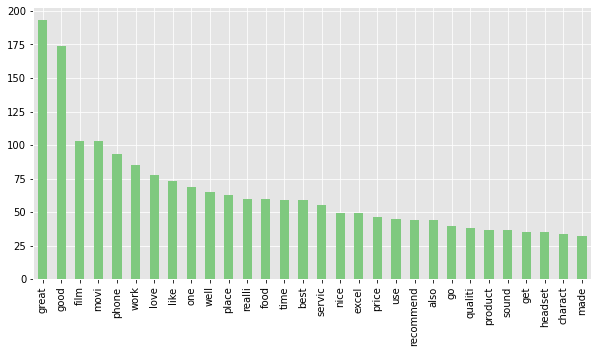

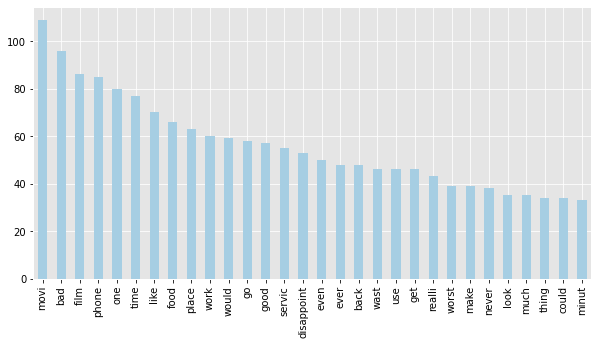

In [46]:
# Display bar graphs for text lemmas
for item in range(2):
    plt.figure(figsize = (10, 5))
    pd.Series(' '.join([i for i in split_df[item]]).split()).value_counts().head(30).plot(kind = 'bar', colormap = color[item])
    plt.show();

In [47]:
# Specify neutral words 
def word_remover(review):
    return ' '.join([i for i in review.split() if i not in ['film', 'get', 'good', 'like', 'movi', 'phone', 'work']])

negative_review = negative_review.apply(word_remover)
positive_review = positive_review.apply(word_remover)

In [48]:
# Create test and training sets and set predictor & outcomes
X = df['clean_review']
y = df['sentiments']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print('Training set:', X_train.shape[0])
print('Test set:', X_test.shape[0])

Training set: 1923
Test set: 825


In [49]:
# Set tokenizer and split dataset 80/20 for training
tokenizer = Tokenizer(oov_token = '<OOV>')

split = round(len(df) * 0.8)
training_reviews = df['clean_review'][:split]
training_sentiments = df['sentiments'][:split]
test_reviews = df['clean_review'][split:]
test_sentiments = df['sentiments'][split:]

In [50]:
# Create training and test lists and append values
training_sentences = []
training_labels = [] 
test_sentences = []
test_labels = []

for row in training_reviews:
    training_sentences.append(str(row))
for row in training_sentiments:
    training_labels.append(row)
for row in test_reviews:
    test_sentences.append(str(row))
for row in test_sentiments:
    test_labels.append(row)

In [51]:
# Create vocabulary parameters and fit training set to tokenizer
vocab_size = 2000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [52]:
# Display index
print("Words:\n", word_index)

Words:
 {'<OOV>': 1, 'movi': 2, 'film': 3, 'good': 4, 'phone': 5, 'great': 6, 'work': 7, 'one': 8, 'like': 9, 'time': 10, 'bad': 11, 'use': 12, 'well': 13, 'realli': 14, 'love': 15, 'would': 16, 'place': 17, 'make': 18, 'even': 19, 'servic': 20, 'go': 21, 'get': 22, 'best': 23, 'ever': 24, 'product': 25, 'qualiti': 26, 'look': 27, 'charact': 28, 'also': 29, 'sound': 30, 'food': 31, 'headset': 32, 'recommend': 33, 'made': 34, 'watch': 35, 'excel': 36, 'batteri': 37, 'act': 38, 'see': 39, 'could': 40, 'never': 41, 'better': 42, 'wast': 43, 'price': 44, 'thing': 45, 'disappoint': 46, 'back': 47, 'ear': 48, 'think': 49, 'year': 50, 'first': 51, 'much': 52, 'case': 53, 'way': 54, 'come': 55, 'nice': 56, 'still': 57, 'end': 58, 'play': 59, 'worst': 60, 'scene': 61, 'tri': 62, 'stori': 63, 'problem': 64, 'right': 65, 'say': 66, 'wonder': 67, 'littl': 68, 'real': 69, 'pretti': 70, 'everyth': 71, 'everi': 72, 'peopl': 73, 'call': 74, 'got': 75, 'actor': 76, 'minut': 77, 'two': 78, 'enough': 79,

In [53]:
print('Total words in vocabulary: ' + str(len(word_index)) + ' words.')

Total words in vocabulary: 1647 words.


In [54]:
# Create padding for sentences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)
test_sentences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(test_sentences, maxlen = max_length)

In [55]:
# Display sentences and padding
print("\nTraining sequences:\n", training_sentences)


Training sequences:
 ['way plug u unless go', 'good case excel valu', 'great jawbon', 'charger convers last minut major problem', 'mic great', 'plug get line right get decent volum', 'sever dozen sever contact imagin fun send one one', 'razr owner must', 'needle say wast money', 'wast money time', 'sound qualiti great', 'impress go origin batteri extend batteri', 'two start notic static sound headset', 'good qualiti though', 'design odd ear clip comfort', 'highli recommend one blue tooth phone', 'advis everyon', 'far good', 'work great', 'work great', 'place way make wonder long would last', 'went motorola websit could get pair', 'bought use fire absolut love', '', 'yet run new batteri two bar three day without charg', 'bought mother problem batteri', 'great pocket pc phone combin', 'own phone month say best mobil phone', 'think instruct provid help', 'peopl hear talk pull talk phone', 'hold charg', 'simpl littl phone use', 'product peopl like ear', 'unus move car speed', 'two year le

In [56]:
# Display length of padded test sentences
print("\nTraining sequences:\n", padded)
print("\nTraining shape:", padded.shape)
print("Training type:", type(test_sentences))
print("Padded Training type:", type(padded))


Training sequences:
 [[   0    0    0 ...  209  381   21]
 [   0    0    0 ...   53   36  271]
 [   0    0    0 ...    0    6  755]
 ...
 [   0    0    0 ...  215  243  190]
 [   0    0    0 ...  754  142 1040]
 [   0    0    0 ...    0    0   47]]

Training shape: (2198, 100)
Training type: <class 'list'>
Padded Training type: <class 'numpy.ndarray'>


In [57]:
# Display example of padded sentence
print("Padded sequence example:\n\n", training_sentences[3])

Padded sequence example:

 charger convers last minut major problem


In [58]:
# Output sentiment categories
print('Sentiment categories', df.sentiments.unique())

Sentiment categories [0 1]


In [59]:
df.groupby('sentiments').count()

,review,word_count,clean_review,polarity
sentiments,,,,
0,1362,1362,1362,1362
1,1386,1386,1386,1386


In [60]:
# Extract prepared dataset
df.to_csv('nlp_prepared_dataset.csv')

In [61]:
# Create TensorFlow deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(), 
    tf.keras.layers.Dense(6, activation = 'relu'), 
    tf.keras.layers.Dense(1, activation = 'softmax') 
])

In [62]:
# Create compiled model and loss function
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [63]:
# Display summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           32000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 32,109
Trainable params: 32,109
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
# Create numpy arrays to enable stopping criteria
training_labels_final = np.array(training_labels)
test_labels_final = np.array(test_labels)

In [65]:
# Set  epochs and fit model
num_epochs = 20

history = model.fit(padded, 
                    training_labels_final, 
                    epochs = num_epochs, 
                    validation_data = (testing_padded, test_labels_final))

Epoch 1/20
69/69 [==============================] - 1s 5ms/step - loss: 0.6927 - accuracy: 0.5168 - val_loss: 0.6962 - val_accuracy: 0.4545
Epoch 2/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5168 - val_loss: 0.6958 - val_accuracy: 0.4545
Epoch 3/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5168 - val_loss: 0.6966 - val_accuracy: 0.4545
Epoch 4/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5168 - val_loss: 0.6951 - val_accuracy: 0.4545
Epoch 5/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5168 - val_loss: 0.6935 - val_accuracy: 0.4545
Epoch 6/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5168 - val_loss: 0.6925 - val_accuracy: 0.4545
Epoch 7/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5168 - val_loss: 0.6910 - val_accuracy: 0.4545
Epoch 8/20
69/69 [==

<Figure size 432x288 with 0 Axes>

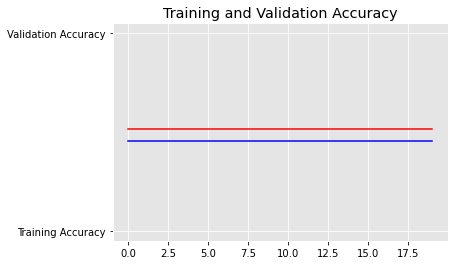

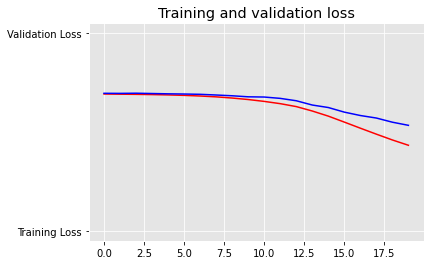

<Figure size 432x288 with 0 Axes>

In [66]:
# Print Training and Validation accurary and training and validation loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [67]:
# Calculate Accuracy
loss, accuracy = model.evaluate(padded, training_labels_final, verbose = 0)
print('Accuracy: %f' % (accuracy * 100))

Accuracy: 51.683348
